# Final Report
Carli Lessard and Men Cheol Jeong  
clessard6 and mjeong42

### Step 1
Answer the following questions in the final project report:
* Which dataset did you select?
Census Income Data Set [link here](https://archive.ics.uci.edu/ml/datasets/census+income)
* Which regulated domain does your dataset belong to?
This dataset was chosen because it could be used for the protected domains of education and employment
* How many observations are in the dataset?
48842
* How many variables in the dataset?
14
* Which variables did you select as your dependent variables?
Workclass and education
* How many and which variables in the dataset are associated with a legally recognized protected class? Which legal precedence/law (as discussed in the lectures)does each protected class fall under?
5 variables are associated with a legally recognized protected class.
1. age: Age Discrimination in Employment Act of 1967
2. marital status: Civil Rights Act of 1968
3. race: Civil Rights Act of 1964, 1991
4. sex: Equal Pay Act of 1963; Civil Rights Act of 1964, 1991
5. native-country: Civil Rights Act of 1964, 1991

### Step 2

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import DisparateImpactRemover, Reweighing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [62]:
df = pd.read_csv(
    "adult.data", 
    header=None, 
    names= ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "more_or_less_50"])

In [63]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,more_or_less_50
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [69]:
df.loc[df.age < 40, "age_category"] = 0
df.loc[df.age >= 40, "age_category"] = 1

#### Age
| Age values | Category     |
| ---------- | ------------ |
| 0-39       | 0 (Under 40) |
| 40+        | 1 (Over 40)  |


In [65]:
for value, category in [
    (" Married-civ-spouse", 0 ),
    (" Married-AF-spouse", 1),
    (" Widowed", 1),
    (" Separated", 1),
    (" Divorced", 1),
    (" Married-spouse-absent", 1),
    (" Never-married", 1)]:
    df.loc[df.marital_status == value, 'marital_category'] = category

#### Marital status
| Marital status value  | Category |
| --------------------- | -------- |
| Married-civ-spouse    | 0 (Spouse present) |
| Divorced              | 1   (Spouse absent)      |
| Never-married        | 1   (Spouse absent)      |
| Separated            | 1   (Spouse absent)      |
| Widowed              | 1   (Spouse absent)      |
| Married-spouse-absent | 1   (Spouse absent)      |
| Married-AF-spouse | 1   (Spouse absent)      |

In [109]:
for value, category in [
    (" White", 0 ),
    (" Asian-Pac-Islander", 1),
    (" Amer-Indian-Eskimo", 1),
    (" Other", 1),
    (" Black", 1),]:
    df.loc[df.race == value, 'race_category'] = category

#### Race
| Race value         | Category |
| ------------------ | -------- |
| White              | 0 (White)       |
| Asian-Pac-Islander | 1 (Not white)       |
| Amer-Indian-Eskimo | 1 (Not white)       |
| Other              | 1  (Not white)      |
| Black              | 1  (Not white)      |

In [68]:
df.loc[df.sex == " Male", "sex_category"] = 0
df.loc[df.sex == " Female", "sex_category"] = 1

#### Sex
| Sex value    | Category |
| ------ | ----------- |
| Male   | 0  (Male)      |
| Female | 1   (Female)   |

In [70]:
df.loc[df.native_country == " United-States", "country_category"] = 0
df.loc[df.native_country != " United-States", "country_category"] = 1

#### Native country
| Native Country | Category |
| -------------- | ----------- |
| United-States  | 0 (US) |
| Canada, Outlying-US(Guam-USVI-etc), Jamaica , Mexico,  Dominican-Republic, Haiti, England, Germany, Greece, Italy, Poland, Portugal, Ireland, France, Hungary, Scotland, Yugoslavia, Holand-Netherlands, Puerto-Rico, Honduras, Guatemala, Nicaragua, El-Salvador, Ecuador, Columbia, Trinadad&Tobago, Peru, Cambodia, India, Japan, China, Philippines, Vietnam, Laos, Taiwan, Thailand, Hong, Iran, South | 1 (Other)        |

In [73]:
for value, category in [
    (' Bachelors', 0),
    (' HS-grad', 0),
    (' Masters', 0),
    (' Some-college', 0),
    (' Assoc-acdm', 0),
    (' Assoc-voc', 0),
    (' Doctorate', 0),
    (' Prof-school', 0),
    (' 11th', 1),
    (' 9th', 1),
    (' 7th-8th', 1),
    (' 5th-6th', 1),
    (' 10th', 1),
    (' 1st-4th', 1),
    (' Preschool', 1),
    (' 12th', 1),]:
    df.loc[df.education == value, 'education_category'] = category

#### Education
| Education                                                                                | Category                         |
| ---------------------------------------------------------------------------------------- | -------------------------------- |
| Bachelors, Some-college, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate | Graduates High School (0)        |
| 11th, 9th, 7th-8th, 12th, 1st-4th, 10th, 5th-6th, Preschool                              | Doesn't Graduate High School (1) |

In [82]:
for value, category in [
    (' Adm-clerical', 0),
    (' Exec-managerial', 0),
    (' Prof-specialty', 0),
    (' Sales', 0),
    (' Tech-support', 0),
    (' Handlers-cleaners', 1),
    (' Other-service', 1),
    (' Craft-repair', 1),
    (' Transport-moving', 1),
    (' Farming-fishing', 1),
    (' Machine-op-inspct', 1),
    (' ?', 1),
    (' Protective-serv', 1),
    (' Armed-Forces', 1),
    (' Priv-house-serv', 1),]:
    df.loc[df.occupation == value, 'job_category'] = category

#### Job Category
| Occupation    | Category |
| ------ | ----------- |
| Craft-repair, Other-service, Handlers-cleaners, Machine-op-inspct, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces | Blue Collar (0) |
| Tech-support, Sales, Exec-managerial, Prof-specialty, Adm-clerical | White Collar (1) |

In [76]:
age_education = df.groupby(['age_category', 'education_category']).size()
age_education.reset_index(name='counts')

,age_category,education_category,counts
0,0.0,0.0,15926
1,0.0,1.0,2398
2,1.0,0.0,12382
3,1.0,1.0,1855


In [77]:
marital_education = df.groupby(['marital_category', 'education_category']).size()
marital_education.reset_index(name='counts')

,marital_category,education_category,counts
0,0.0,0.0,13281
1,0.0,1.0,1695
2,1.0,0.0,15027
3,1.0,1.0,2558


In [78]:
race_education = df.groupby(['race_category', 'education_category']).size()
race_education.reset_index(name='counts')

,race_category,education_category,counts
0,0.0,0.0,24335
1,0.0,1.0,3481
2,1.0,0.0,3717
3,1.0,1.0,717


In [79]:
sex_education = df.groupby(['sex_category', 'education_category']).size()
sex_education.reset_index(name='counts')

,sex_category,education_category,counts
0,0.0,0.0,18858
1,0.0,1.0,2932
2,1.0,0.0,9450
3,1.0,1.0,1321


In [80]:
country_education = df.groupby(['country_category', 'education_category']).size()
country_education.reset_index(name='counts')

,country_category,education_category,counts
0,0.0,0.0,25836
1,0.0,1.0,3334
2,1.0,0.0,2472
3,1.0,1.0,919


In [83]:
age_job = df.groupby(['age_category', 'job_category']).size()
age_job.reset_index(name='counts')

,age_category,job_category,counts
0,0.0,0.0,8838
1,0.0,1.0,9486
2,1.0,0.0,7716
3,1.0,1.0,6521


In [84]:
marital_job = df.groupby(['marital_category', 'job_category']).size()
marital_job.reset_index(name='counts')

,marital_category,job_category,counts
0,0.0,0.0,7623
1,0.0,1.0,7353
2,1.0,0.0,8931
3,1.0,1.0,8654


In [110]:
race_job = df.groupby(['race_category', 'job_category']).size()
race_job.reset_index(name='counts')

,race_category,job_category,counts
0,0.0,0.0,14424
1,0.0,1.0,13392
2,1.0,0.0,2130
3,1.0,1.0,2615


In [86]:
sex_job = df.groupby(['sex_category', 'job_category']).size()
sex_job.reset_index(name='counts')

,sex_category,job_category,counts
0,0.0,0.0,9732
1,0.0,1.0,12058
2,1.0,0.0,6822
3,1.0,1.0,3949


In [87]:
country_job = df.groupby(['country_category', 'job_category']).size()
country_job.reset_index(name='counts')

,country_category,job_category,counts
0,0.0,0.0,15091
1,0.0,1.0,14079
2,1.0,0.0,1463
3,1.0,1.0,1928


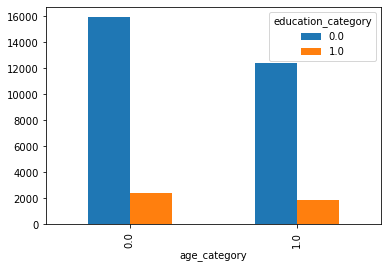

In [88]:
age_education.unstack().plot(kind="bar")

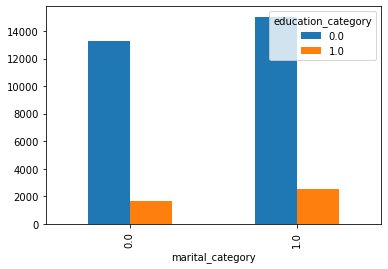

In [89]:
marital_education.unstack().plot(kind="bar")

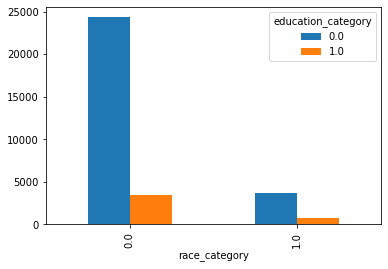

In [90]:
race_education.unstack().plot(kind="bar")

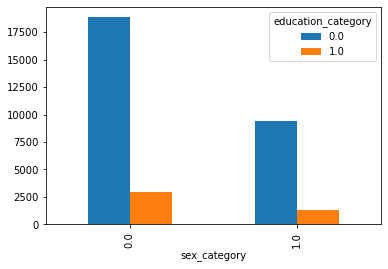

In [91]:
sex_education.unstack().plot(kind="bar")

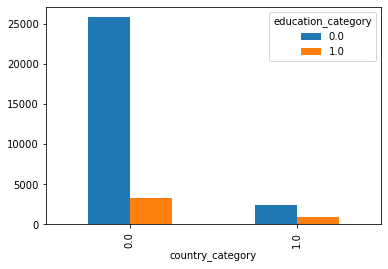

In [92]:
country_education.unstack().plot(kind="bar")

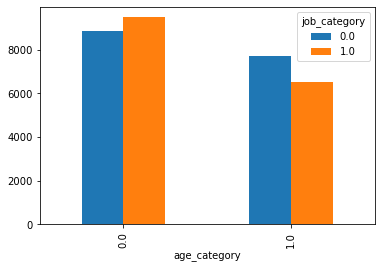

In [93]:
age_job.unstack().plot(kind="bar")

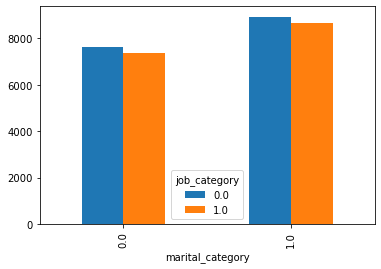

In [94]:
marital_job.unstack().plot(kind="bar")

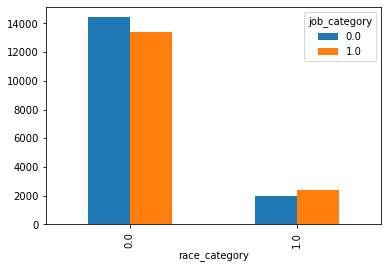

In [95]:
race_job.unstack().plot(kind="bar")

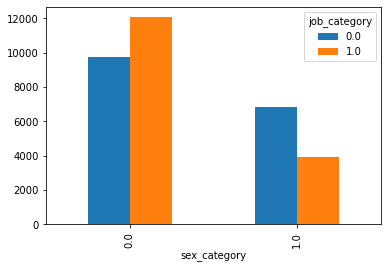

In [96]:
sex_job.unstack().plot(kind="bar")

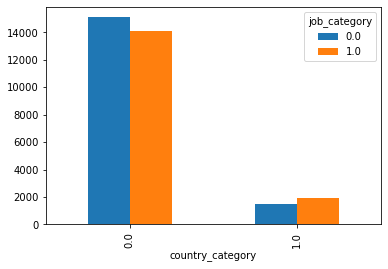

In [98]:
country_job.unstack().plot(kind="bar")

### Step 3
The privileged group for the Education variable is having a high school diploma, and the unprivileged group is not finishing high school.  
The privileged group for the Job variable is the White-Collar group, and the unprivileged group is the Blue-Collar group.

#### Education - Age

##### Fairness Metrics

In [114]:
def run_fairness(
    protected_category='age_category',
    privileged_classes=[lambda x: x == 1],
    privileged_groups=[{'age_category': 1}],
    unprivileged_groups=[{'age_category': 0}],
    depedent_category='education_category',
    favorable_value=0,
):
    def favorable(x):
        if x == favorable_value:
            return True
        else:
            return False
    
    sd = StandardDataset(
        df=df,
        label_name=depedent_category,
        favorable_classes=favorable,
        protected_attribute_names=[protected_category],
        privileged_classes=privileged_classes,
        features_to_keep=[depedent_category, protected_category]
    )
    metrics = BinaryLabelDatasetMetric(
        sd,
        privileged_groups=privileged_groups,
        unprivileged_groups=unprivileged_groups
    )
    print("Original SPD: {}".format(metrics.statistical_parity_difference()))
    print("Original DI: {}".format(metrics.disparate_impact()))
    disp_ir = Reweighing(
        unprivileged_groups, privileged_groups,
    ).fit_transform(sd)
    new_metrics = BinaryLabelDatasetMetric(disp_ir, 
                                               unprivileged_groups=unprivileged_groups,
                                               privileged_groups=privileged_groups)
    print("New SPD: {}".format(new_metrics.statistical_parity_difference()))
    print("New DI: {}".format(new_metrics.disparate_impact()))
    


run_fairness(
    protected_category='age_category',
    privileged_classes=[lambda x: x == 1],
    privileged_groups=[{'age_category': 1}],
    unprivileged_groups=[{'age_category': 0}],
    depedent_category='education_category',
    favorable_value=0)


Original SPD: -0.000572319432885382
Original DI: 0.9993419389625271
New SPD: 2.220446049250313e-16
New DI: 1.0000000000000002


#### Education - Marital

##### Fairness Metrics

In [115]:
run_fairness(
    protected_category='marital_category',
    privileged_classes=[lambda x: x == 1],
    privileged_groups=[{'marital_category': 1}],
    unprivileged_groups=[{'marital_category': 0}],
    depedent_category='education_category',
    favorable_value=0)

Original SPD: 0.03228379510144863
Original DI: 1.0377793662646553
New SPD: 2.220446049250313e-16
New DI: 1.0000000000000002


#### Education - Race

##### Fairness Metrics

In [116]:
run_fairness(
    protected_category='race_category',
    privileged_classes=[lambda x: x == 1],
    privileged_groups=[{'race_category': 1}],
    unprivileged_groups=[{'race_category': 0}],
    depedent_category='education_category',
    favorable_value=0)

Original SPD: 0.03755377426793505
Original DI: 1.0448509083567459
New SPD: -1.1102230246251565e-16
New DI: 0.9999999999999999


#### Education - Sex

##### Fairness Metrics

In [117]:
run_fairness(
    protected_category='sex_category',
    privileged_classes=[lambda x: x == 1],
    privileged_groups=[{'sex_category': 1}],
    unprivileged_groups=[{'sex_category': 0}],
    depedent_category='education_category',
    favorable_value=0)

Original SPD: -0.011912999266425417
Original DI: 0.986421702105961
New SPD: 2.220446049250313e-16
New DI: 1.0000000000000002


#### Education - Native Country

##### Fairness Metrics

In [118]:
run_fairness(
    protected_category='country_category',
    privileged_classes=[lambda x: x == 1],
    privileged_groups=[{'country_category': 1}],
    unprivileged_groups=[{'country_category': 0}],
    depedent_category='education_category',
    favorable_value=0)

Original SPD: 0.15671599194746788
Original DI: 1.2149773174327927
New SPD: -2.220446049250313e-16
New DI: 0.9999999999999998


#### Job - Age

##### Fairness Metrics

##### Pre-processing Bias Mitigation

##### Fairness Metrics Transformed

#### Job - Marital

##### Fairness Metrics

##### Pre-processing Bias Mitigation

##### Fairness Metrics Transformed

#### Job - Race

##### Fairness Metrics

##### Pre-processing Bias Mitigation

##### Fairness Metrics Transformed

#### Job - Sex

##### Fairness Metrics

##### Pre-processing Bias Mitigation

##### Fairness Metrics Transformed

#### Job - Native Country

##### Fairness Metrics

##### Pre-processing Bias Mitigation

##### Fairness Metrics Transformed

### Step 4
#### Option A?

In [119]:
protected_category='age_category'
privileged_classes=[lambda x: x == 1]
privileged_groups=[{'age_category': 1}]
unprivileged_groups=[{'age_category': 0}]
depedent_category='education_category'
favorable_value=0
sd = StandardDataset(
    df=df,
    label_name=depedent_category,
    favorable_classes=favorable,
    protected_attribute_names=[protected_category],
    privileged_classes=privileged_classes,
    features_to_keep=[depedent_category, protected_category]
)
sd_rw = Reweighing(
        unprivileged_groups, privileged_groups,
    ).fit_transform(sd)

dataset_orig_train, dataset_orig_test = sd.split([0.7], shuffle=True)
dataset_rw_train, dataset_rw_test = sd_rw.split([0.7], shuffle=True)

In [157]:
# Logistic regression classifier and predictions
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(dataset_orig_train.features)
y_train = dataset_orig_train.labels.ravel()
w_train = dataset_orig_train.instance_weights.ravel()

lmod = LogisticRegression()
lmod.fit(X_train, y_train, 
         sample_weight=dataset_orig_train.instance_weights)
y_train_pred = lmod.predict(X_train)

# positive class index
pos_ind = np.where(lmod.classes_ == dataset_orig_train.favorable_label)[0][0]

dataset_orig_train_pred = dataset_orig_train.copy()
dataset_orig_train_pred.labels = y_train_pred

In [158]:
dataset_orig_train_pred

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

### Step 5

Men Cheol's response:  

Carli's response:  